<a href="https://colab.research.google.com/github/tdelossan3/Deep-Learning24/blob/main/Ejerciciopropuesto_ModuloTextMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

Funciones de carga y preparación de datos

In [2]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [3]:
import pandas as pd
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
!pip install textacy
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
import spacy
import textacy

2023-06-29 10:53:34.751560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 10:53:35.930682: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-06-29 10:53:44.138532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 10:53:44.932121: W tensorflow/compiler/tf2tensorrt/utils/py

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [5]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [6]:
datos_ejercicio.head(4)

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train


## 2. Análisis exploratorio

In [8]:
textos_tweet = datos_ejercicio['tweet_text'].to_list()
print(type(textos_tweet))
print("Nuestro corpus tiene un total de {} documentos".format(len(textos_tweet)))

<class 'list'>
Nuestro corpus tiene un total de 8000 documentos


In [14]:
import spacy
import textacy

nlp = spacy.load('es_core_news_sm')
lista_tokens_tweet = [nlp(datos) for datos in textos_tweet]
type(lista_tokens_tweet[0])

spacy.tokens.doc.Doc

In [15]:
for num,sentence in enumerate(lista_tokens_tweet[0].sents):
  print('La oración número {} es: \n {}'.format(num, sentence))

La oración número 0 es: 
 CHINA: libera una pandemia EE.UU: libera OVNIS ARGENTINA: libera presos  Jajajajajajaja


In [16]:
for num,sentence in enumerate(lista_tokens_tweet[0].sents):
    print('La oración {} tiene {} tokens'.format(num, len(sentence)))
    tokens=[word for word in sentence]
    print(tokens)

La oración 0 tiene 15 tokens
[CHINA, :, libera, una, pandemia, EE.UU, :, libera, OVNIS, ARGENTINA, :, libera, presos,  , Jajajajajajaja]


In [20]:
import spacy
import textacy

nlp=spacy.load('es_core_news_sm')

nlp_texto = [nlp(texto_to_process) for texto_to_process in textos_tweet]
print("cuatrigramas: ", list(textacy.extract.ngrams(nlp_texto[0],4, min_freq=1, filter_stops = False, filter_punct =False)))

cuatrigramas:  [CHINA: libera una, : libera una pandemia, libera una pandemia EE.UU, una pandemia EE.UU:, pandemia EE.UU: libera, EE.UU: libera OVNIS, : libera OVNIS ARGENTINA, libera OVNIS ARGENTINA:, OVNIS ARGENTINA: libera, ARGENTINA: libera presos]


In [23]:
def frecuencia_tokens(lista):
    # Creamos diccionario vacío
    frecuencia = {}
    for item in lista:
        if (item in frecuencia):
            frecuencia[item] += 1
        else:
            frecuencia[item] = 1
    return frecuencia

In [24]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

lista_tokens = list()
for i in textos_tweet:
  tokens_document = word_tokenize(i)
  lista_tokens.extend(tokens_document)

dict_frec = frecuencia_tokens(lista_tokens)

In [25]:
dict_frec_order = sorted(dict_frec.items(), key=lambda x: x[1], reverse=True)
token_names = list()
token_frecs = list()
for i in dict_frec_order:
  if i[1] > 2500:
    token_names.append(i[0])
    token_frecs.append(i[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'de'),
  Text(1, 0, '.'),
  Text(2, 0, ','),
  Text(3, 0, 'la'),
  Text(4, 0, ':'),
  Text(5, 0, 'que'),
  Text(6, 0, '#'),
  Text(7, 0, 'el'),
  Text(8, 0, 'en'),
  Text(9, 0, 'https'),
  Text(10, 0, 'y'),
  Text(11, 0, 'a'),
  Text(12, 0, '@'),
  Text(13, 0, 'los'),
  Text(14, 0, 'por'),
  Text(15, 0, 'del'),
  Text(16, 0, 'no')])

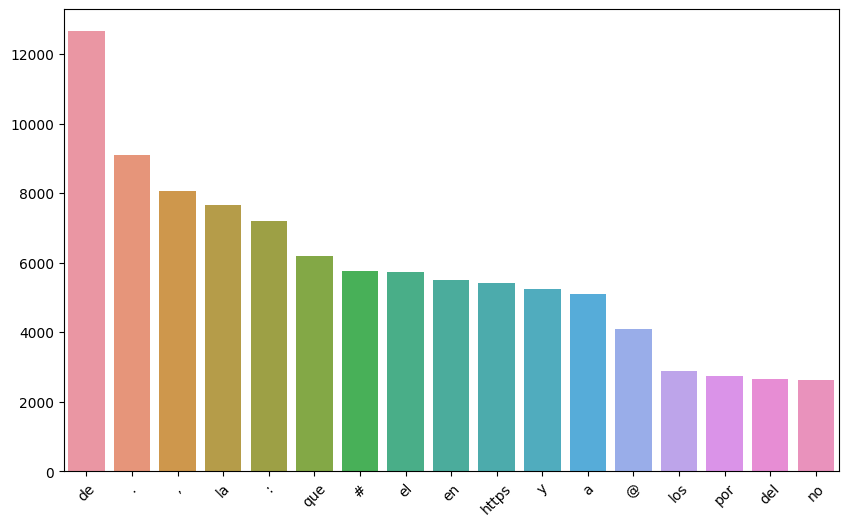

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
sns_g = sns.barplot(x=token_names, y=token_frecs)
plt.xticks(rotation=45)

## 3. Preprocesado y Normalización

In [29]:
import spacy
import textacy
from nltk import word_tokenize
from nltk.stem import SnowballStemmer

nlp = spacy.load("es_core_news_sm")

texto_cero = nlp(textos_tweet[0])
texto_cero_lower = [token.text.lower() for token in texto_cero]

SStemmer_spanish = SnowballStemmer("spanish")
print("Términos en español:")
for word in texto_cero_lower:
  print("Palabra original: {}, Snowball: {}".format(word,SStemmer_spanish.stem(word)))



Términos en español:
Palabra original: china, Snowball: chin
Palabra original: :, Snowball: :
Palabra original: libera, Snowball: liber
Palabra original: una, Snowball: una
Palabra original: pandemia, Snowball: pandemi
Palabra original: ee.uu, Snowball: ee.uu
Palabra original: :, Snowball: :
Palabra original: libera, Snowball: liber
Palabra original: ovnis, Snowball: ovnis
Palabra original: argentina, Snowball: argentin
Palabra original: :, Snowball: :
Palabra original: libera, Snowball: liber
Palabra original: presos, Snowball: pres
Palabra original:  , Snowball:  
Palabra original: jajajajajajaja, Snowball: jajajajajajaj


In [ ]:
import spacy
import textacy

SPACY_POS_LIST = ["ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ",
                  "DET", "INTJ", "NOUN", "NUM", "PART", "PRON",
                  "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "SPACE"]

In [31]:
texto_cero = nlp(textos_tweet[0])

for w in texto_cero:
    print( "La palabra '{}' es un {} ".format(w.text, w.pos_))

La palabra 'CHINA' es un NOUN 
La palabra ':' es un PUNCT 
La palabra 'libera' es un VERB 
La palabra 'una' es un DET 
La palabra 'pandemia' es un NOUN 
La palabra 'EE.UU' es un PROPN 
La palabra ':' es un PUNCT 
La palabra 'libera' es un NOUN 
La palabra 'OVNIS' es un PROPN 
La palabra 'ARGENTINA' es un PROPN 
La palabra ':' es un PUNCT 
La palabra 'libera' es un VERB 
La palabra 'presos' es un NOUN 
La palabra ' ' es un SPACE 
La palabra 'Jajajajajajaja' es un PROPN 


In [32]:
texto_cero = nlp(textos_tweet[0])
print([(X.text, X.label_) for X in tokens.ents])

[('CHINA', 'LOC'), ('EE.UU', 'LOC'), ('OVNIS', 'MISC'), ('ARGENTINA', 'ORG'), ('Jajajajajajaja', 'ORG')]


In [33]:
from spacy import displacy
displacy.render(texto_cero, jupyter=True, style='ent')

In [34]:
from spacy import displacy

texto_cero = nlp(textos_tweet[0])
displacy.render(texto_cero,style='dep',jupyter=True)

## 4. Vectorización

## 5. Entrenamiento y evaluación de modelos
